In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [11]:
db=pd.read_csv(r'C:\Users\HP\Downloads\diabetes_prediction_dataset.csv')

In [12]:
db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
db.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [15]:
db.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# here I'm Not going to Delet Dublicate Value Because Diabetes data like there many value similar same age people Has Same Number HbA1c_level or blood_glucose_level	It Important Information

In [17]:
db.duplicated().sum() 

3854

In [18]:
db.shape

(100000, 9)

In [19]:
db.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [20]:
db[db.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [21]:
db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [22]:
db['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [23]:
db['gender']=db['gender'].replace("Other","Female")

In [24]:
db['gender'].value_counts()

gender
Female    58570
Male      41430
Name: count, dtype: int64

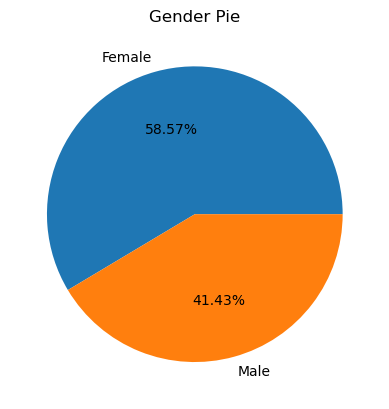

In [25]:
value=[58570,41430]
labels=['Female','Male']

plt.pie(x=value,labels=labels,autopct="%.2f%%")
plt.title("Gender Pie")
plt.show()

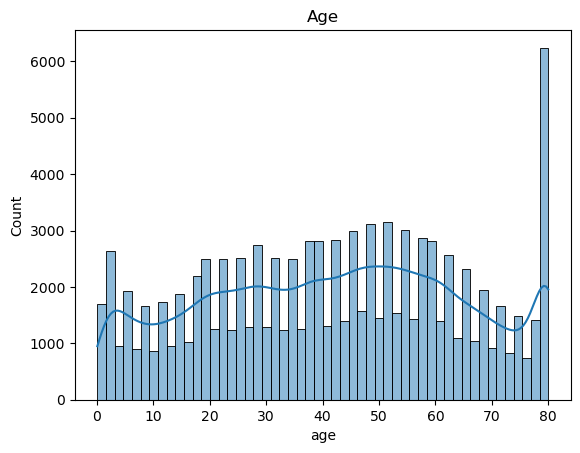

In [26]:
sns.histplot(x=db['age'],kde=True)
plt.title('Age')
plt.show()

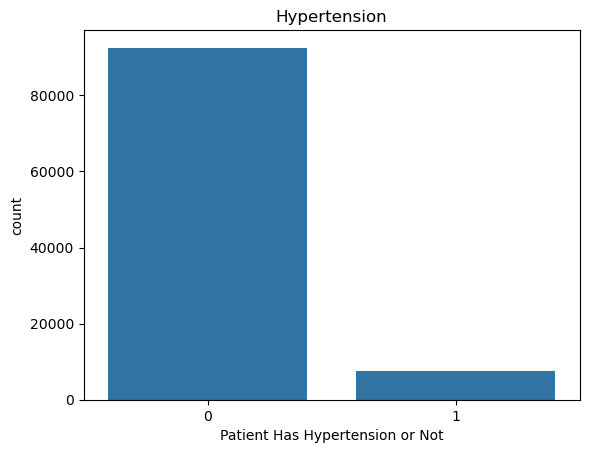

In [27]:
sns.countplot(x=db['hypertension'])
plt.xlabel('Patient Has Hypertension or Not')
plt.title("Hypertension")
plt.show()

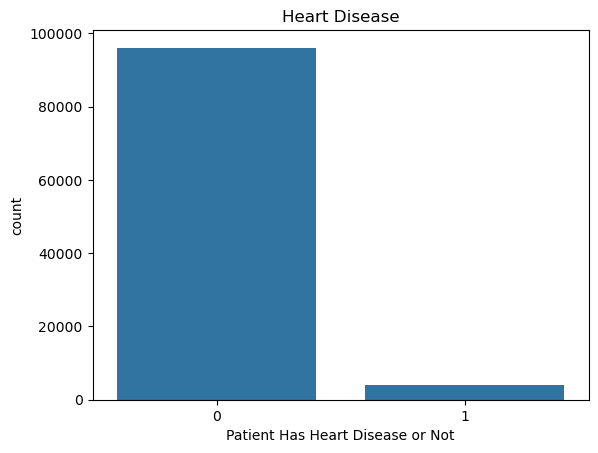

In [28]:
sns.countplot(x=db['heart_disease'])
plt.xlabel('Patient Has Heart Disease or Not')
plt.title("Heart Disease")
plt.show()

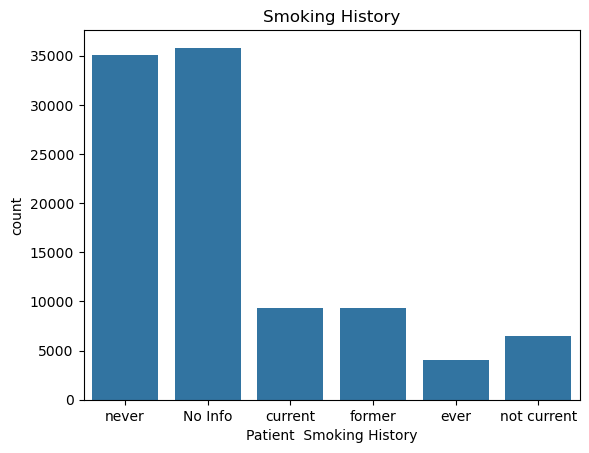

In [29]:
sns.countplot(x=db['smoking_history'])
plt.xlabel('Patient  Smoking History')
plt.title("Smoking History")
plt.show()

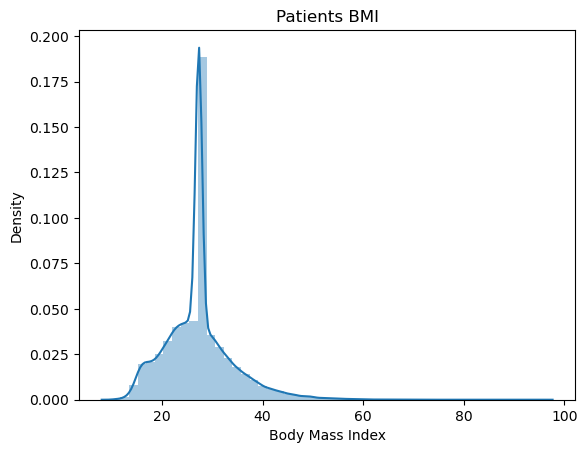

In [30]:
sns.distplot(x=db['bmi'])
plt.xlabel("Body Mass Index")
plt.title('Patients BMI')
plt.show()

In [31]:
db['HbA1c_level'].value_counts()

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

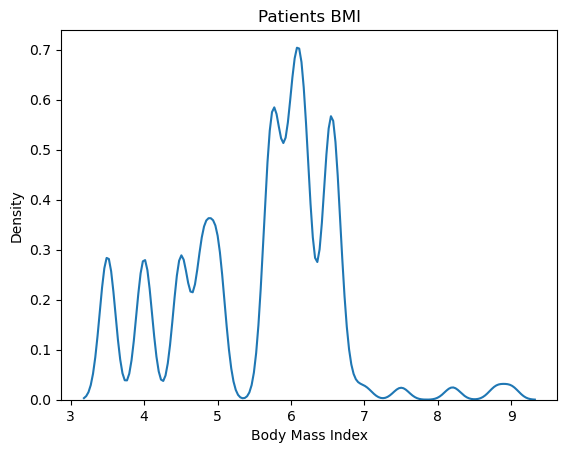

In [32]:
sns.distplot(x=db['HbA1c_level'],hist=False)
plt.xlabel("Body Mass Index")
plt.title('Patients BMI')
plt.show()

In [33]:
db['blood_glucose_level'].value_counts()

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

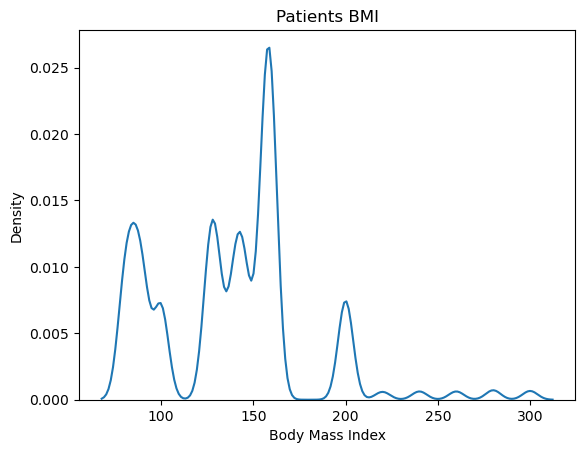

In [34]:
sns.distplot(x=db['blood_glucose_level'],hist=False)
plt.xlabel("Body Mass Index")
plt.title('Patients BMI')
plt.show()

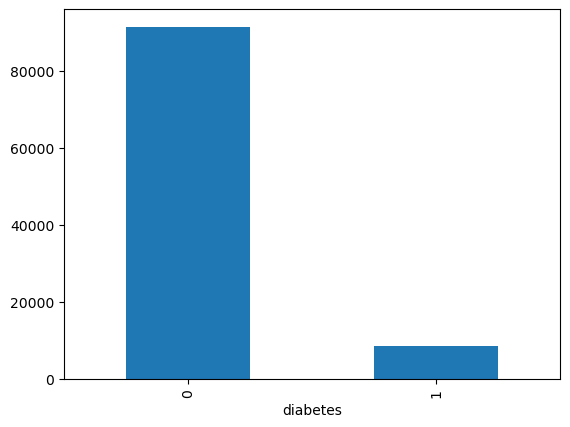

In [35]:
db['diabetes'].value_counts().plot(kind="bar")
plt.show()

In [36]:
db[db['hypertension']==1][db['diabetes']==1][db['heart_disease']==1][db['smoking_history']=='current']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1277,Female,67.0,1,1,current,28.52,6.5,200,1
7364,Female,59.0,1,1,current,33.10,7.0,300,1
10573,Male,73.0,1,1,current,25.18,8.8,155,1
12562,Male,77.0,1,1,current,26.63,8.8,140,1
13302,Male,68.0,1,1,current,27.32,8.8,155,1
17653,Male,80.0,1,1,current,27.32,6.1,126,1
19182,Male,78.0,1,1,current,37.98,9.0,200,1
21527,Male,70.0,1,1,current,35.13,6.8,280,1
26514,Male,69.0,1,1,current,29.80,6.0,260,1
29384,Male,66.0,1,1,current,27.32,7.5,145,1


In [37]:
pd.pivot_table(data=db,index="smoking_history",columns="gender",values=['bmi','HbA1c_level','blood_glucose_level'])

HbA1c_level           blood_glucose_level              \
gender               Female      Male              Female        Male   
smoking_history                                                         
No Info            5.451644  5.473793          135.247843  135.239851   
current            5.525860  5.574480          137.860815  141.772233   
ever               5.531130  5.637734          138.346583  140.525779   
former             5.596313  5.709786          140.774822  145.759065   
never              5.525695  5.575562          138.274572  139.635769   
not current        5.565825  5.570348          138.909717  140.144893   

                       bmi             
gender              Female       Male  
smoking_history                        
No Info          25.644592  24.975212  
current          28.365338  28.513874  
ever             28.768423  28.753309  
former           29.498685  29.748034  
never            28.102252  28.109054  
not current      28.279865  28.089014

In [38]:
db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [39]:
db['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [40]:
ordinal_mapping = {
    'No Info': 0,        
    'never': 1,          
    'not current': 2,    
    'former': 3,         
    'ever': 4,          
    'current': 5         
}


In [42]:
db['smoking_history'] = db['smoking_history'].map(ordinal_mapping)


In [44]:
db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,1,25.19,6.6,140,0
1,Female,54.0,0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,1,27.32,5.7,158,0
3,Female,36.0,0,0,5,23.45,5.0,155,0
4,Male,76.0,1,1,5,20.14,4.8,155,0


In [46]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=int)

In [56]:
new_ohe=ohe.fit_transform(db[['gender']])

In [60]:
new_gender=pd.DataFrame(new_ohe,columns=['Gender'])

In [66]:
new=pd.concat([db,new_gender],axis=1)

In [72]:
new.drop(['gender'],axis=1,inplace=True)

In [74]:
new

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Gender
0,80.0,0,1,1,25.19,6.6,140,0,0
1,54.0,0,0,0,27.32,6.6,80,0,0
2,28.0,0,0,1,27.32,5.7,158,0,1
3,36.0,0,0,5,23.45,5.0,155,0,0
4,76.0,1,1,5,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,0,27.32,6.2,90,0,0
99996,2.0,0,0,0,17.37,6.5,100,0,0
99997,66.0,0,0,3,27.83,5.7,155,0,1
99998,24.0,0,0,1,35.42,4.0,100,0,0


In [329]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [80]:
x=new.drop('diabetes',axis=1)

In [84]:
y=new['diabetes']

In [89]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [157]:
x_train.shape

(80000, 8)

In [212]:
from sklearn.preprocessing import MinMaxScaler

In [214]:
mm=MinMaxScaler()

In [218]:
scling_train=mm.fit_transform(x_train)

In [222]:
scling_test=mm.transform(x_test)

In [305]:
model=Sequential()

In [307]:
x_train.shape

(80000, 8)

In [309]:
model.add(Dense(64,activation='relu',input_dim=8))
model.add(Dense(32,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [311]:
optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [313]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(scling_train, y_train, validation_data=(scling_test, y_test), epochs=60, batch_size=64, callbacks=[early_stop])

Epoch 1/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9315 - loss: 0.2361 - val_accuracy: 0.9596 - val_loss: 0.1159
Epoch 2/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9598 - loss: 0.1150 - val_accuracy: 0.9603 - val_loss: 0.1138
Epoch 3/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9603 - loss: 0.1142 - val_accuracy: 0.9614 - val_loss: 0.1124
Epoch 4/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9631 - loss: 0.1094 - val_accuracy: 0.9621 - val_loss: 0.1069
Epoch 5/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9655 - loss: 0.1025 - val_accuracy: 0.9654 - val_loss: 0.1002
Epoch 6/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9656 - loss: 0.0974 - val_accuracy: 0.9669 - val_loss: 0.0950
Epoch 7/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9656 - loss: 0.0981 - val_accuracy: 0.9682 - val_loss: 0.0910
Epoch 8/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9675 - loss: 0.0942 -

In [327]:
train_loss, train_acc = model.evaluate(scling_train, y_train)
print(f"train Accuracy: {train_acc:.4f}")

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9711 - loss: 0.0819
train Accuracy: 0.9718


In [315]:
test_loss, test_acc = model.evaluate(scling_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")



625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0825
Test Accuracy: 0.9716


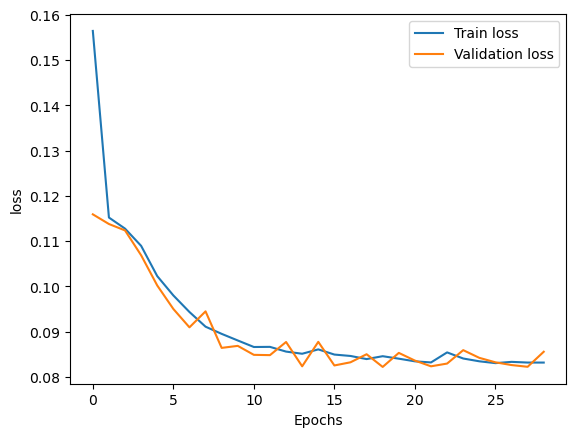

In [316]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

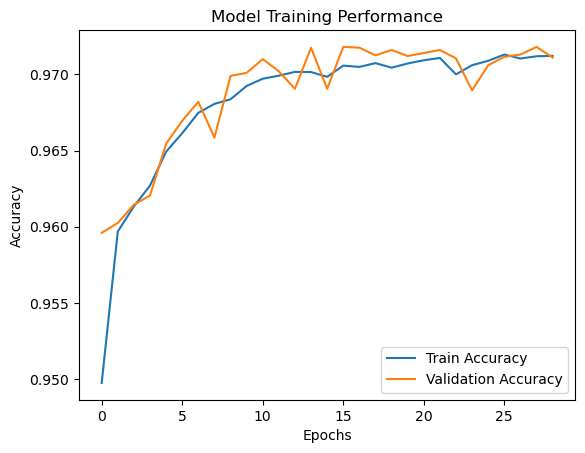

In [317]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training Performance')
plt.show()


In [318]:
from sklearn.metrics import classification_report

y_pred = (model.predict(scling_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.99      0.68      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

